# SERS and Raman data calibration and alignment

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as rpd

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Read the data

### Indene and Raman

#### Wavenumber support

#### Background

In [17]:
f_sup_785_650, back_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr650.tif")

In [7]:
f_sup_785_1250, back_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1250.tif")

In [8]:
f_sup_785_1850, back_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/BG 2min ctr1850.tif")

In [18]:
f_sup_785_650

array([  25.4348,   26.1163,   26.7976, ..., 1167.2911, 1167.7601,
       1168.2291])

#### Indene

In [9]:
_, indene_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr650 2min 10x PlanN 32mW.tif")

In [10]:
_, indene_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1250 2min 10x PlanN 32mW.tif")

In [11]:
_, indene_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Indene ctr1850 2min 10x PlanN 32mW.tif")

#### Carbendazim Raman 

Pay attention that it is 2 min integration time. Probably for good comparison you will have to normalize it.

In [12]:
_, car_650 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr650 2min 10x PlanN 32mW.tif")

In [13]:
_, car_1250 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1250 2min 10x PlanN 32mW.tif")

In [14]:
_, car_1850 = rd.read_data("data/20221111 Indene Carbendazim 785 Raman/Cab ctr1850 2min 10x PlanN 32mW.tif")

#### Background for Thiacloprid and Acetamiprid; 20 secs 4 avg

In [16]:
f_sup_background_20s_4avg, background_20s_4avg = rd.read_data("data/20220816 Analyte 532 Raman/background 20s 4avg.tif")

#### Thiacloprid Raman

In [18]:
_, thia_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No2 Thiacloprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

#### Acetamiprid Raman

In [19]:
_, aceta_raman_20s = rd.read_data("data/20220816 Analyte 532 Raman/No4 Acetamiprid powder/20s 4avg 100um fiber HWP42 MR-Newton ctr1400.tif")

### Analytes SERS

#### 1 - Carbendazim

In [21]:
f_sup_sers, car_batch1_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_1.tif")
f_sup_sers, car_batch2_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_2.tif")
f_sup_sers, car_batch3_3min_mapping = rd.read_data("data/20220422 SERS data generation/analyte 1/mapping50X50/1_3min_b3_50X50_spectral_mapping_3.tif")

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'


#### 2 - Thiacloprid

In [22]:
thia_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_1.tif")
thia_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_2.tif")
thia_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 2/mapping 50X50/2_3min_b3_50X50_spectral_mapping_3.tif")

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'


#### 4 - Acetamiprid

In [23]:
aceta_batch1_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_1.tif")
aceta_batch2_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_2.tif")
aceta_batch3_3min_mapping = rd.read_data("data/20220421 SERS data generation/analyte 4/mapping50X50/4_3min_b3_50X50_spectral_mapping_3.tif")

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'


## Visualize the data

#### Carbendazim: Raman and SERS

In [28]:
y_pos = 30000  # y position of the text
rotation_angle = 65  # angle of the text rotation

In [113]:
# Indene peaks
indene_peaks = [203, 381, 534, 592, 730, 861, 1019, 1068,
                1153, 1205, 1226, 1288, 1312, 1361, 1457, 1588, 1609]

indene_true_peaks = [180, 340, 480, 540, 680, 815, 989, 1048]

# text_pos= [730, 1018, 1205, 1361, 1393, 1458, 1553, 1610]
text_pos = [730, 1018, 1205, 1553]
# text = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
text = ['A', 'B', 'C', 'G']

In [39]:
# Carbendazim peaks
carbendazim_peaks = [617, 723, 960, 1018, 1473]
carbendazim_peaks_2 = 1260
carbendazim_peaks_3 = 1270

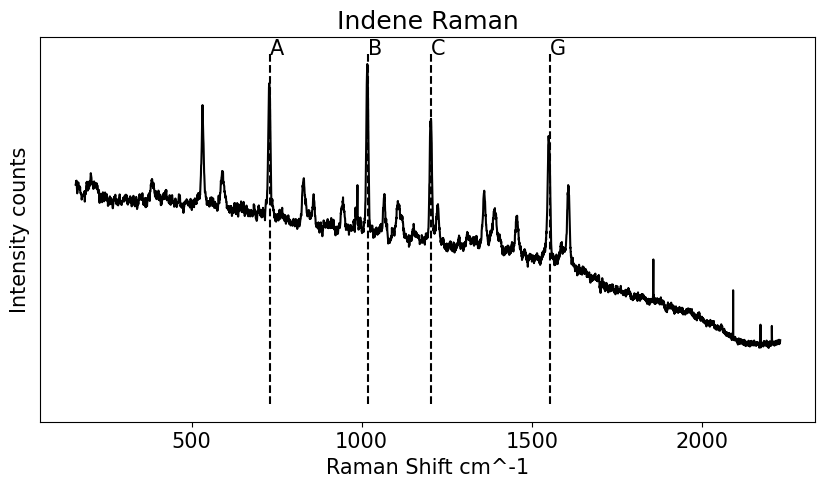

In [120]:
# Used only 650 and 1250 because Indene peaks went only till 1600
plt.figure(figsize=(10,5))
# plt.plot(f_sup_785_650, indene_650 + 10000, color='green')
# plt.plot(f_sup_785_1250 + 40, indene_1250 + 10000, color='green')
plt.plot(f_sup_785_whole[200:], indene_whole[200:], color='black')
# plt.vlines(x=indene_peaks, ymin=0, ymax=0.6, colors="k", linestyles="dashed")
# plt.vlines(x=indene_true_peaks, ymin=16000, ymax=22500, color='r', linestyles='dashed')
# for peak_pos, peak_label in enumerate(indene_peaks):
#     plt.text(indene_peaks[peak_pos], y_pos, str(peak_label), rotation=rotation_angle)

# for true_peak in indene_true_peaks:
#     plt.text(x=true_peak, y=22500, s=str(true_peak), rotation=rotation_angle, color="red")
    
plt.vlines(x=text_pos, ymin=0, ymax=0.56, colors="k", linestyles="dashed")
for idx, true_peak in enumerate(text_pos):
    plt.text(x=true_peak, y=0.56, s=text[idx], color='black')
    
# plt.vlines(x=[1100], y=)
plt.rc('font', size=15)
plt.title("Indene Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/indene_raman.png", dpi=500)

In [55]:
car_whole_norm_sers_mean = np.mean(car_batch1_3min_mapping, axis=0) / np.max(np.mean(car_batch1_3min_mapping, axis=0))

In [83]:
y_max = 1.35

([], [])

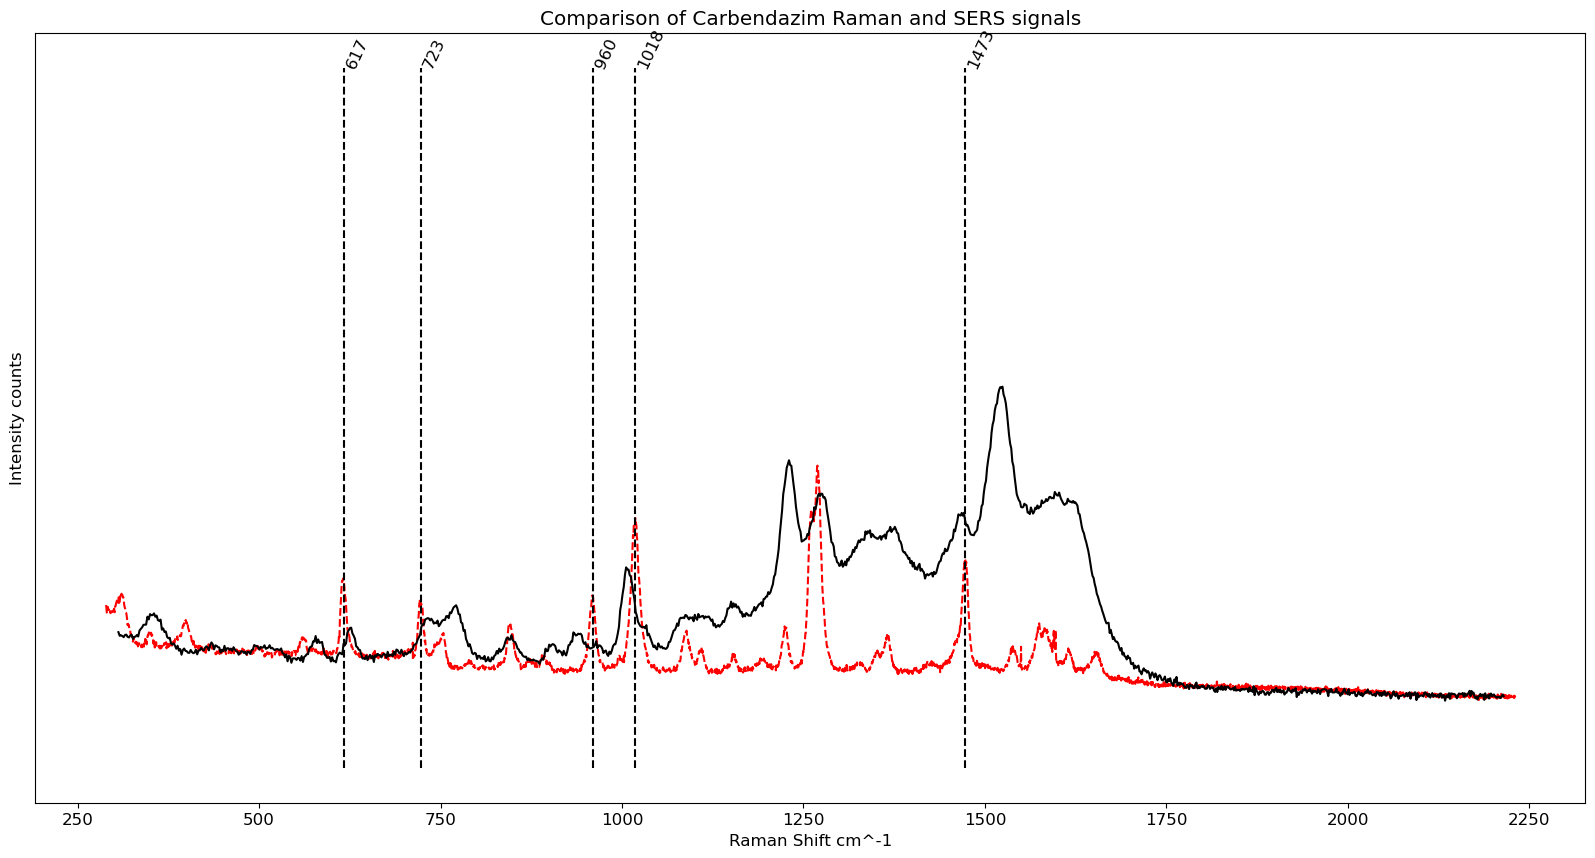

In [162]:
plt.figure(figsize=(20,10))
plt.plot(f_sup_785_whole[400:], car_whole[400:] * 1.3, color='red', linestyle='--')
plt.plot(f_sup_sers[180:1400], car_whole_norm_sers_mean[180:1400], color='black')

plt.vlines(x=carbendazim_peaks, ymin=0, ymax=y_max, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(carbendazim_peaks):
    plt.text(x=true_peak, y=y_max, s=str(true_peak), rotation=rotation_angle, color='black')

# plt.vlines(x=carbendazim_peaks_2, ymin=0, ymax=y_max, colors="k", linestyles="dashed")
# plt.text(x=carbendazim_peaks_2 - 50, y=y_max, s=str(carbendazim_peaks_2), rotation=rotation_angle, color='black')
# plt.vlines(x=carbendazim_peaks_3, ymin=0, ymax=y_max, colors="k", linestyles="dashed")
# plt.text(x=carbendazim_peaks_3, y=y_max, s=str(carbendazim_peaks_3), rotation=rotation_angle, color='black')

    
plt.rc('font', size=12)
plt.title("Comparison of Carbendazim Raman and SERS signals")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
# plt.savefig("carbendazim_raman_sers_comparison.png", dpi=500)

In [47]:
car_whole = np.concatenate((car_650[:1110], car_1250, car_1850[650:]))
car_whole = car_whole / np.max(car_whole)
car_whole = rpd.remove_cosmic_rays(car_whole, 10)

In [95]:
indene_whole = np.concatenate((indene_650[:1110], indene_1250, indene_1850[650:] - 850))
indene_whole = indene_whole / np.max(indene_whole)
indene_whole = rpd.remove_cosmic_rays(indene_whole, 10)

In [48]:
f_sup_785_whole = np.concatenate((f_sup_785_650[:1110], f_sup_785_1250, f_sup_785_1850[650:]))

In [46]:
car_whole.shape

(4460,)

#### Thiacloprid: Raman and SERS

In [122]:
# Thiacloprid peaks
thia_peaks = [588, 639, 688, 815, 1009, 1096, 1424, 1585]


In [125]:
thia_raman_norm = thia_raman_20s /  np.max(thia_raman_20s)
thia_sers_mean_norm = np.mean(thia_batch1_3min_mapping, axis=0) / np.max(np.mean(thia_batch1_3min_mapping, axis=0))

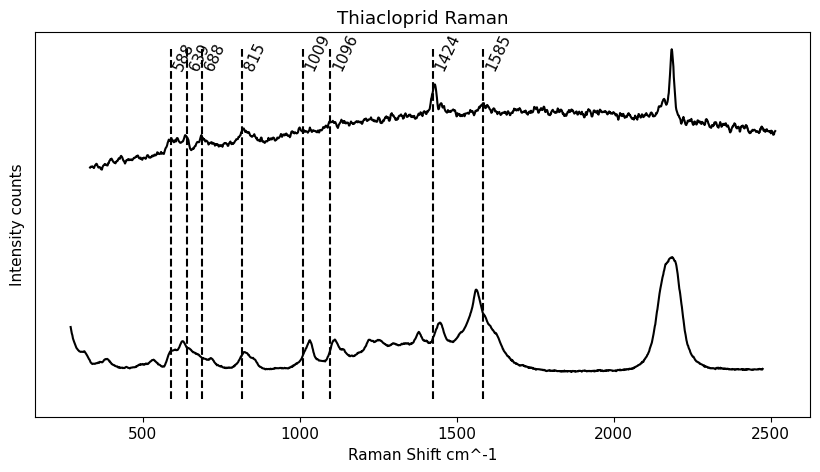

In [139]:
plt.figure(figsize=(10,5))
plt.plot(f_sup_background_20s_4avg[160:], thia_raman_norm[160:] + 0.7, color='black')
plt.plot(f_sup_sers[160:], thia_sers_mean_norm[160:], color='black')
plt.vlines(x=thia_peaks, ymin=0, ymax=1.7, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(thia_peaks):
    plt.text(x=true_peak, y=1.6, s=str(true_peak), rotation=rotation_angle, color='black')
    
plt.rc('font', size=11)
plt.title("Thiacloprid Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/comparison_thiacloprid_raman_sers.png", dpi=500)

#### Acetamiprid: Raman and SERS

In [140]:
# Acetamiprid peaks
aceta_peaks = [634, 827, 1111, 2164]

In [147]:
aceta_raman_norm = aceta_raman_20s /  np.max(aceta_raman_20s)
aceta_sers_mean_norm = np.mean(aceta_batch1_3min_mapping, axis=0) / np.max(np.mean(aceta_batch1_3min_mapping, axis=0))

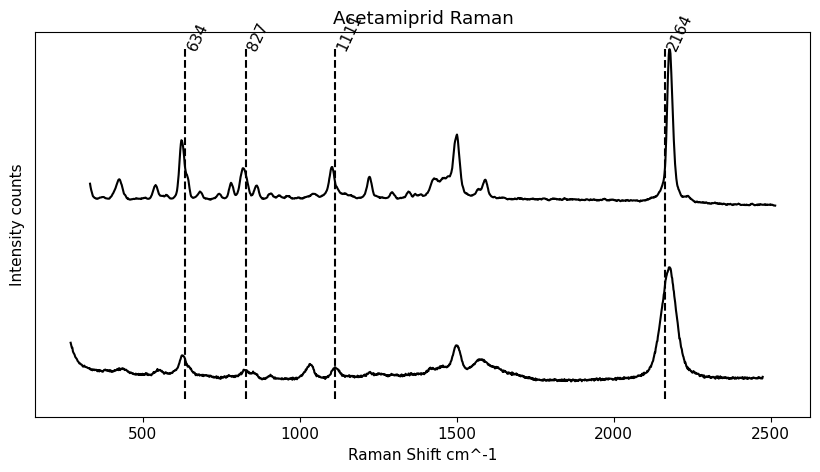

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(f_sup_background_20s_4avg[160:], aceta_raman_norm[160:] + 1, color='black')
plt.plot(f_sup_sers[160:], aceta_sers_mean_norm[160:], color='black')
plt.vlines(x=aceta_peaks, ymin=0, ymax=2, colors="k", linestyles="dashed")    
for idx, true_peak in enumerate(aceta_peaks):
    plt.text(x=true_peak, y=2, s=str(true_peak), rotation=rotation_angle, color='black')
    
plt.rc('font', size=11)
plt.title("Acetamiprid Raman")
plt.xlabel('Raman Shift cm^-1')
plt.ylabel('Intensity counts')
plt.yticks([])
plt.savefig("plots/comparison_acetamiprid_raman_sers.png", dpi=500)